# 2. EDA and Sentiment Analysis with NLTK 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import string

from datetime import datetime, timedelta
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.utils.multiclass import unique_labels


plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
df = pd.read_csv('finviz_ev2.csv')
df.head()

,stock,headline,source,date,time
0,TSLA,"Polestar Upgrades Model, Hits EV Production Mi...",(Barrons.com),Aug-23-23,09:07AM
1,TSLA,15 Highest Paying Countries for Engineers,(Insider Monkey),Aug-23-23,09:07AM
2,TSLA,Tesla's German plant lowers production target ...,(Reuters),Aug-23-23,09:07AM
3,TSLA,"Down 9% in the Past 5 Days, Is Now the Right T...",(Motley Fool),Aug-23-23,09:07AM
4,TSLA,Tesla's German plant lowers production target ...,(Reuters),Aug-23-23,09:07AM


In [3]:
df['stock'] = df['stock'].astype(str)
df['headline'] = df['headline'].astype(str)
df

,stock,headline,source,date,time
0,TSLA,"Polestar Upgrades Model, Hits EV Production Mi...",(Barrons.com),Aug-23-23,09:07AM
1,TSLA,15 Highest Paying Countries for Engineers,(Insider Monkey),Aug-23-23,09:07AM
2,TSLA,Tesla's German plant lowers production target ...,(Reuters),Aug-23-23,09:07AM
3,TSLA,"Down 9% in the Past 5 Days, Is Now the Right T...",(Motley Fool),Aug-23-23,09:07AM
4,TSLA,Tesla's German plant lowers production target ...,(Reuters),Aug-23-23,09:07AM
...,...,...,...,...,...
595,LCID,Lucid stock declines after missing on Q4 reven...,(Yahoo Finance Video),Feb-23-23,04:17PM
596,LCID,EV Startups Have a New Bottleneck: Demand,(The Wall Street Journal),Feb-23-23,04:17PM
597,LCID,EV Startup Lucid Aims to Nearly Double Product...,(The Wall Street Journal),Feb-22-23,09:14PM
598,LCID,"Yahoo Finance Trending Tickers: Nvidia, Lucid,...",(Yahoo Finance),Feb-22-23,09:14PM


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   stock     600 non-null    object
 1   headline  600 non-null    object
 2   source    600 non-null    object
 3   date      600 non-null    object
 4   time      600 non-null    object
dtypes: object(5)
memory usage: 23.6+ KB


In [5]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
count_vectorizer = CountVectorizer()
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sunisa.poonpipatgul\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sunisa.poonpipatgul\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sunisa.poonpipatgul\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
df['cleaned_headline'] = df['headline'].str.lower()

df['cleaned_headline'] = df['cleaned_headline'].apply(lambda x: re.sub(r"http\S+|www\S+|https\S+", "", x))
df['cleaned_headline'] = df['cleaned_headline'].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))
df['cleaned_headline'] = df['cleaned_headline'].apply(lambda x: re.sub(r"\d+", "", x))
df['cleaned_headline'] = df['cleaned_headline'].apply(lambda x: word_tokenize(x))

stopwords_list = stopwords.words('english')
df['cleaned_headline'] = df['cleaned_headline'].apply(lambda x: [word for word in x if word not in stopwords_list])

df['cleaned_headline'] = df['cleaned_headline'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

df.head()

,stock,headline,source,date,time,cleaned_headline
0,TSLA,"Polestar Upgrades Model, Hits EV Production Mi...",(Barrons.com),Aug-23-23,09:07AM,"[polestar, upgrade, model, hit, ev, production..."
1,TSLA,15 Highest Paying Countries for Engineers,(Insider Monkey),Aug-23-23,09:07AM,"[highest, paying, country, engineer]"
2,TSLA,Tesla's German plant lowers production target ...,(Reuters),Aug-23-23,09:07AM,"[tesla, german, plant, lower, production, targ..."
3,TSLA,"Down 9% in the Past 5 Days, Is Now the Right T...",(Motley Fool),Aug-23-23,09:07AM,"[past, day, right, time, buy, bitcoin]"
4,TSLA,Tesla's German plant lowers production target ...,(Reuters),Aug-23-23,09:07AM,"[tesla, german, plant, lower, production, targ..."


In [7]:
df['cleaned_headline'] = [' '.join(Headline) for Headline in df['cleaned_headline']]

In [8]:
count_vectorizer = CountVectorizer()

In [9]:
df

,stock,headline,source,date,time,cleaned_headline
0,TSLA,"Polestar Upgrades Model, Hits EV Production Mi...",(Barrons.com),Aug-23-23,09:07AM,polestar upgrade model hit ev production miles...
1,TSLA,15 Highest Paying Countries for Engineers,(Insider Monkey),Aug-23-23,09:07AM,highest paying country engineer
2,TSLA,Tesla's German plant lowers production target ...,(Reuters),Aug-23-23,09:07AM,tesla german plant lower production target ami...
3,TSLA,"Down 9% in the Past 5 Days, Is Now the Right T...",(Motley Fool),Aug-23-23,09:07AM,past day right time buy bitcoin
4,TSLA,Tesla's German plant lowers production target ...,(Reuters),Aug-23-23,09:07AM,tesla german plant lower production target ami...
...,...,...,...,...,...,...
595,LCID,Lucid stock declines after missing on Q4 reven...,(Yahoo Finance Video),Feb-23-23,04:17PM,lucid stock decline missing q revenue estimate
596,LCID,EV Startups Have a New Bottleneck: Demand,(The Wall Street Journal),Feb-23-23,04:17PM,ev startup new bottleneck demand
597,LCID,EV Startup Lucid Aims to Nearly Double Product...,(The Wall Street Journal),Feb-22-23,09:14PM,ev startup lucid aim nearly double production
598,LCID,"Yahoo Finance Trending Tickers: Nvidia, Lucid,...",(Yahoo Finance),Feb-22-23,09:14PM,yahoo finance trending ticker nvidia lucid ets...


### Exploratory Data Analysis

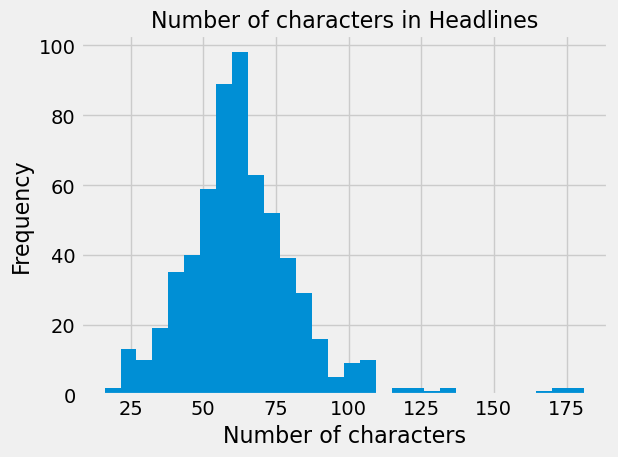

In [10]:
headline_lengths = df['headline'].str.len()
plt.hist(headline_lengths, bins=30)  

plt.xlabel('Number of characters', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Number of characters in Headlines', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

From this histogram, the news headlines range from 25 to 175 characters. Most of the news headlines are in between 25-100 characters. 

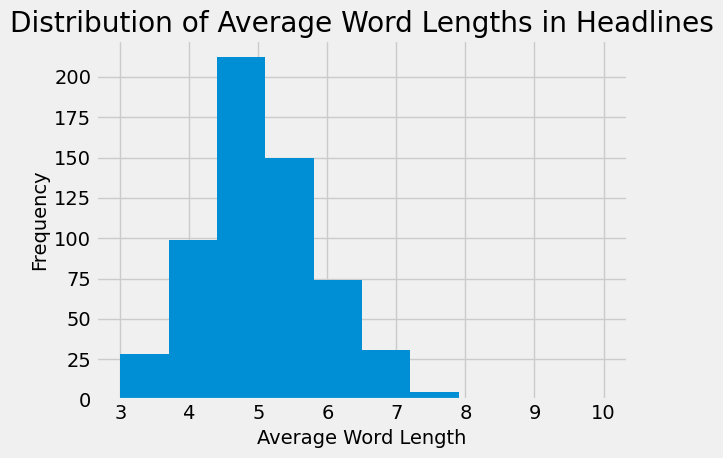

In [11]:
average_word_lengths = df['headline'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))

plt.hist(average_word_lengths)

plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Average Word Lengths in Headlines')

plt.tight_layout()
plt.show()

Average word length ranges between 3 to 8 words. With 5 is the most frequent word length found in the headlines. 

Top words in Finviz headlines:
       Word  Count
0     stock    271
1        ev    166
2     tesla    143
3       nio     95
4     xpeng     81
5        li     75
6     lucid     73
7    rivian     68
8  earnings     62
9     china     59


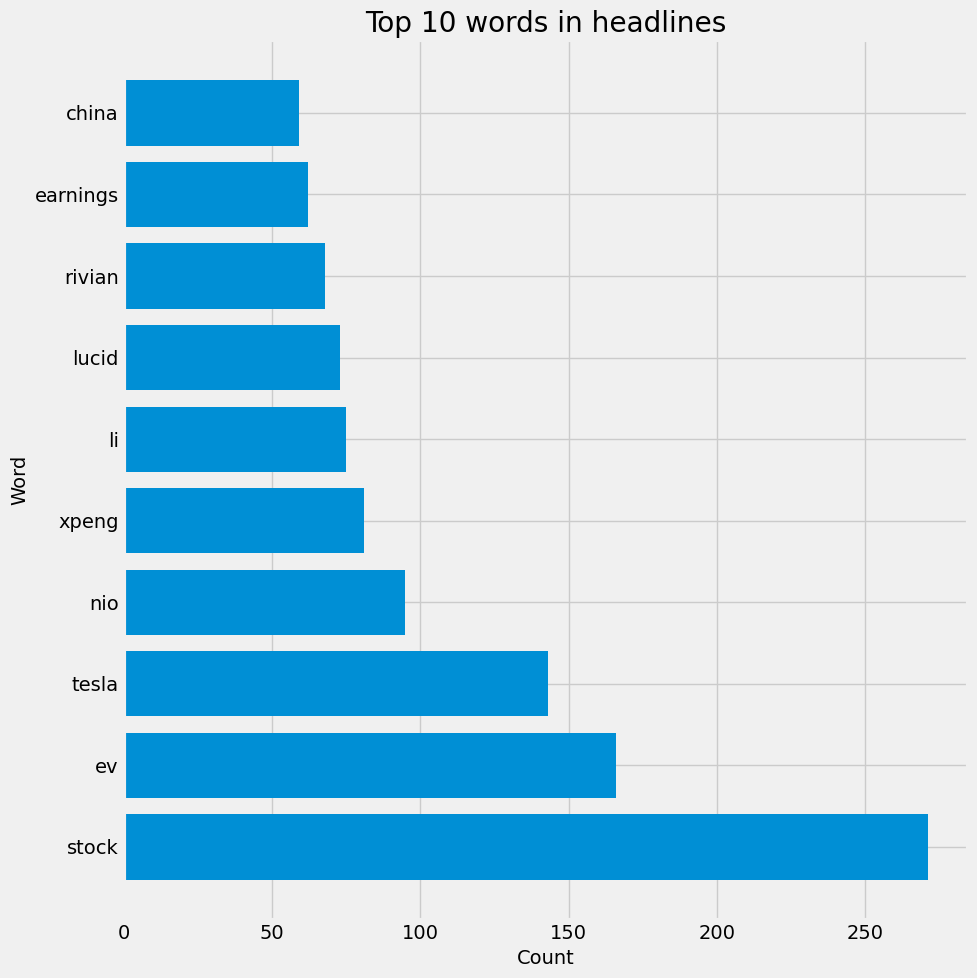

In [12]:
headline_counts = count_vectorizer.fit_transform(df['cleaned_headline'])

feature_names = count_vectorizer.get_feature_names_out()

word_counts = headline_counts.toarray().sum(axis=0)

top_words = pd.DataFrame({
    'Word': feature_names,
    'Count': word_counts
})

top_words = top_words.sort_values('Count', ascending=False).reset_index(drop=True)

print("Top words in Finviz headlines:")
print(top_words.head(10))

top_n = 10


plt.figure(figsize=(10, 10))
plt.barh(top_words['Word'][:top_n], top_words['Count'][:top_n])
plt.xlabel('Count')
plt.ylabel('Word')
plt.title("Top {} words in headlines".format(top_n))
plt.tight_layout()
plt.show()


Unsurprisingly, most of the top words are EV brands as these news are curated related to the brands. Tesla is the most popular brands mentioned here. Follow by Nio, Xpeng, Li, lucid, and rivian. However, considering that maximum 100 news topics are collected per brands. But tesla brand mentioned are more than 100. This might be some news comparing Tesla and other brands in headlines. 
China as the country that considers as leaders of EV maker is one of the word regularly mentioned in headlines.

## Sentiment Analysis

In [13]:
# add new words and value to suit the financial news headlines
nltk.download('vader_lexicon')
new_words = {
    'crushes': 10,
    'beats': 5,
    'misses': -5,
    'trouble': -10,
    'falls': -100,
}

vader = SentimentIntensityAnalyzer()
vader.lexicon.update(new_words)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sunisa.poonpipatgul\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
#polarity scores
scores = [vader.polarity_scores(headline) for headline in df.headline.values]
scores_df = pd.DataFrame(scores)
scored_news = pd.concat([df, scores_df], axis=1)

scored_news

,stock,headline,source,date,time,cleaned_headline,neg,neu,pos,compound
0,TSLA,"Polestar Upgrades Model, Hits EV Production Mi...",(Barrons.com),Aug-23-23,09:07AM,polestar upgrade model hit ev production miles...,0.167,0.833,0.0,-0.3818
1,TSLA,15 Highest Paying Countries for Engineers,(Insider Monkey),Aug-23-23,09:07AM,highest paying country engineer,0.000,1.000,0.0,0.0000
2,TSLA,Tesla's German plant lowers production target ...,(Reuters),Aug-23-23,09:07AM,tesla german plant lower production target ami...,0.130,0.870,0.0,-0.1280
3,TSLA,"Down 9% in the Past 5 Days, Is Now the Right T...",(Motley Fool),Aug-23-23,09:07AM,past day right time buy bitcoin,0.000,1.000,0.0,0.0000
4,TSLA,Tesla's German plant lowers production target ...,(Reuters),Aug-23-23,09:07AM,tesla german plant lower production target ami...,0.130,0.870,0.0,-0.1280
...,...,...,...,...,...,...,...,...,...,...
595,LCID,Lucid stock declines after missing on Q4 reven...,(Yahoo Finance Video),Feb-23-23,04:17PM,lucid stock decline missing q revenue estimate,0.216,0.784,0.0,-0.2960
596,LCID,EV Startups Have a New Bottleneck: Demand,(The Wall Street Journal),Feb-23-23,04:17PM,ev startup new bottleneck demand,0.231,0.769,0.0,-0.1280
597,LCID,EV Startup Lucid Aims to Nearly Double Product...,(The Wall Street Journal),Feb-22-23,09:14PM,ev startup lucid aim nearly double production,0.000,1.000,0.0,0.0000
598,LCID,"Yahoo Finance Trending Tickers: Nvidia, Lucid,...",(Yahoo Finance),Feb-22-23,09:14PM,yahoo finance trending ticker nvidia lucid ets...,0.000,1.000,0.0,0.0000


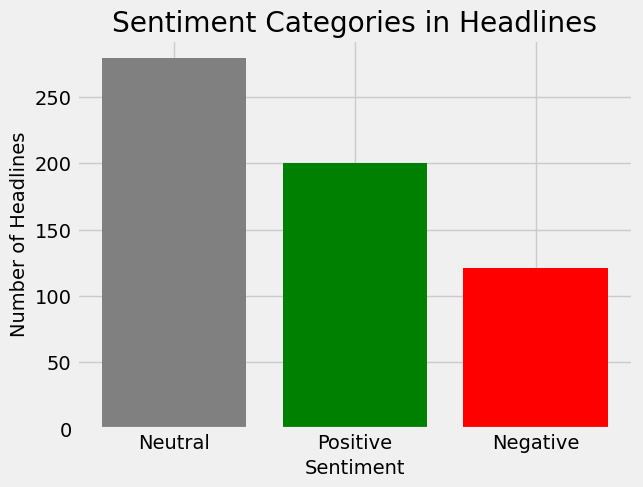

In [15]:
scores = [vader.polarity_scores(headline)['compound'] for headline in df.headline.values]
sentiment_labels = ['Negative' if score < 0 else 'Neutral' if score == 0 else 'Positive' for score in scores]
scored_news['sentiment_label'] = sentiment_labels
sentiment_counts = pd.Series(sentiment_labels).value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['grey', 'green', 'red'])

plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')
plt.title('Sentiment Categories in Headlines')

# Display the plot
plt.show()


In [16]:
scored_news

,stock,headline,source,date,time,cleaned_headline,neg,neu,pos,compound,sentiment_label
0,TSLA,"Polestar Upgrades Model, Hits EV Production Mi...",(Barrons.com),Aug-23-23,09:07AM,polestar upgrade model hit ev production miles...,0.167,0.833,0.0,-0.3818,Negative
1,TSLA,15 Highest Paying Countries for Engineers,(Insider Monkey),Aug-23-23,09:07AM,highest paying country engineer,0.000,1.000,0.0,0.0000,Neutral
2,TSLA,Tesla's German plant lowers production target ...,(Reuters),Aug-23-23,09:07AM,tesla german plant lower production target ami...,0.130,0.870,0.0,-0.1280,Negative
3,TSLA,"Down 9% in the Past 5 Days, Is Now the Right T...",(Motley Fool),Aug-23-23,09:07AM,past day right time buy bitcoin,0.000,1.000,0.0,0.0000,Neutral
4,TSLA,Tesla's German plant lowers production target ...,(Reuters),Aug-23-23,09:07AM,tesla german plant lower production target ami...,0.130,0.870,0.0,-0.1280,Negative
...,...,...,...,...,...,...,...,...,...,...,...
595,LCID,Lucid stock declines after missing on Q4 reven...,(Yahoo Finance Video),Feb-23-23,04:17PM,lucid stock decline missing q revenue estimate,0.216,0.784,0.0,-0.2960,Negative
596,LCID,EV Startups Have a New Bottleneck: Demand,(The Wall Street Journal),Feb-23-23,04:17PM,ev startup new bottleneck demand,0.231,0.769,0.0,-0.1280,Negative
597,LCID,EV Startup Lucid Aims to Nearly Double Product...,(The Wall Street Journal),Feb-22-23,09:14PM,ev startup lucid aim nearly double production,0.000,1.000,0.0,0.0000,Neutral
598,LCID,"Yahoo Finance Trending Tickers: Nvidia, Lucid,...",(Yahoo Finance),Feb-22-23,09:14PM,yahoo finance trending ticker nvidia lucid ets...,0.000,1.000,0.0,0.0000,Neutral


Most of the news headlines has neutral sentiment, around 200 are in positive sentiments and some negative headline are less than neutral and positive.

### Plot the sentiment

C:\Users\sunisa.poonpipatgul\AppData\Local\Temp\ipykernel_15700\581302672.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_c = scored_news.groupby(['date', 'stock']).mean()


<Figure size 1000x3000 with 0 Axes>

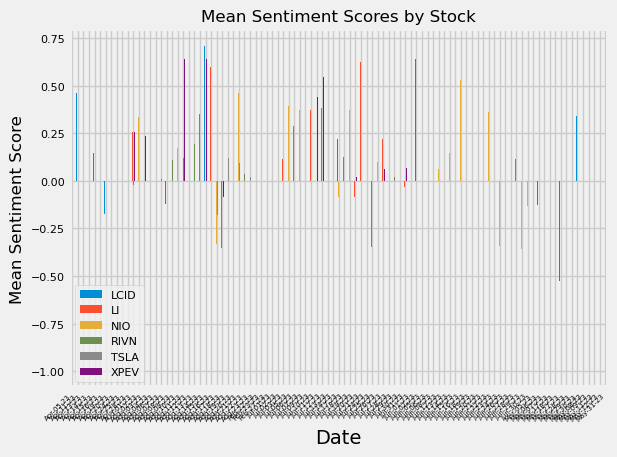

In [17]:
plt.figure(figsize=(10,30))

mean_c = scored_news.groupby(['date', 'stock']).mean()
mean_c = mean_c.unstack(level=1)
mean_c = mean_c.xs('compound', axis=1)
mean_c.plot.bar()

plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=5)

plt.title('Mean Sentiment Scores by Stock', fontsize=12)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(mean_c.columns))

plt.yticks(fontsize=8)
plt.legend(fontsize=8)

plt.tight_layout()


Overall, distribution of sentiment of EV manufacturers' stocks news headline is on the positive sentiment. We may consider that market has positive perception about this segment.

In [18]:
mean_c

stock,LCID,LI,NIO,RIVN,TSLA,XPEV
date,,,,,,
Apr-05-23,0.571900,NaN,NaN,NaN,NaN,NaN
Apr-11-23,0.458800,NaN,NaN,NaN,NaN,NaN
Apr-13-23,0.292950,NaN,NaN,NaN,NaN,NaN
Apr-14-23,-0.108425,NaN,NaN,NaN,NaN,NaN
Apr-15-23,0.147600,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
May-08-23,0.063640,NaN,NaN,NaN,NaN,NaN
May-09-23,0.000000,NaN,NaN,NaN,NaN,NaN
May-11-23,0.000000,NaN,NaN,NaN,NaN,NaN


### The sentiment on top stock on the latest day

In [19]:
single_day = scored_news.set_index(['stock', 'date'])
single_day

headline  \
stock date                                                           
TSLA  Aug-23-23  Polestar Upgrades Model, Hits EV Production Mi...   
      Aug-23-23          15 Highest Paying Countries for Engineers   
      Aug-23-23  Tesla's German plant lowers production target ...   
      Aug-23-23  Down 9% in the Past 5 Days, Is Now the Right T...   
      Aug-23-23  Tesla's German plant lowers production target ...   
...                                                            ...   
LCID  Feb-23-23  Lucid stock declines after missing on Q4 reven...   
      Feb-23-23          EV Startups Have a New Bottleneck: Demand   
      Feb-22-23  EV Startup Lucid Aims to Nearly Double Product...   
      Feb-22-23  Yahoo Finance Trending Tickers: Nvidia, Lucid,...   
      Feb-22-23  Stocks moving in after-hours: Nvidia, Lucid, E...   

                                    source     time  \
stock date                                            
TSLA  Aug-23-23              (Barrons.com)  09:07AM   
      Aug-23-23           (Insider Monkey)  09:07AM   
      Aug-23-23                  (Reuters)  09:07AM   
      Aug-23-23              (Motley Fool)  09:07AM   
      Aug-23-23                  (Reuters)  09:07AM   
...                                    ...      ...   
LCID  Feb-23-23      (Yahoo Finance Video)  04:17PM   
      Feb-23-23  (The Wall Street Journal)  04:17PM   
      Feb-22-23  (The Wall Street Journal)  09:14PM   
      Feb-22-23            (Yahoo Finance)  09:14PM   
      Feb-22-23            (Yahoo Finance)  09:14PM   

                                                  cleaned_headline    neg  \
stock date                                                                  
TSLA  Aug-23-23  polestar upgrade model hit ev production miles...  0.167   
      Aug-23-23                    highest paying country engineer  0.000   
      Aug-23-23  tesla german plant lower production target ami...  0.130   
      Aug-23-23                    past day right time buy bitcoin  0.000   
      Aug-23-23  tesla german plant lower production target ami...  0.130   
...                                                            ...    ...   
LCID  Feb-23-23     lucid stock decline missing q revenue estimate  0.216   
      Feb-23-23                   ev startup new bottleneck demand  0.231   
      Feb-22-23      ev startup lucid aim nearly double production  0.000   
      Feb-22-23  yahoo finance trending ticker nvidia lucid ets...  0.000   
      Feb-22-23   stock moving afterhours nvidia lucid etsy bumble  0.000   

                   neu  pos  compound sentiment_label  
stock date                                             
TSLA  Aug-23-23  0.833  0.0   -0.3818        Negative  
      Aug-23-23  1.000  0.0    0.0000         Neutral  
      Aug-23-23  0.870  0.0   -0.1280        Negative  
      Aug-23-23  1.000  0.0    0.0000         Neutral  
      Aug-23-23  0.870  0.0   -0.1280        Negative  
...                ...  ...       ...             ...  
LCID  Feb-23-23  0.784  0.0   -0.2960        Negative  
      Feb-23-23  0.769  0.0   -0.1280        Negative  
      Feb-22-23  1.000  0.0    0.0000         Neutral  
      Feb-22-23  1.000  0.0    0.0000         Neutral  
      Feb-22-23  1.000  0.0    0.0000         Neutral  

[600 rows x 9 columns]

In [20]:
# The latest sentiment on TSLA
single_day = scored_news.set_index(['stock', 'date'])
single_day = single_day.loc['TSLA']
single_day = single_day.loc['Aug-23-23']
# Convert the datetime string to just the time
single_day['time'] = pd.to_datetime(single_day['time'])
# Set the index to time and 
single_day['time'] = single_day.time.dt.time
# Sort it
single_day.set_index('time', inplace=True)
single_day=single_day.sort_index(ascending=True)

single_day

,headline,source,cleaned_headline,neg,neu,pos,compound,sentiment_label
time,,,,,,,,
09:07:00,"Polestar Upgrades Model, Hits EV Production Mi...",(Barrons.com),polestar upgrade model hit ev production miles...,0.167,0.833,0.000,-0.3818,Negative
09:07:00,15 Highest Paying Countries for Engineers,(Insider Monkey),highest paying country engineer,0.000,1.000,0.000,0.0000,Neutral
09:07:00,Tesla's German plant lowers production target ...,(Reuters),tesla german plant lower production target ami...,0.130,0.870,0.000,-0.1280,Negative
09:07:00,"Down 9% in the Past 5 Days, Is Now the Right T...",(Motley Fool),past day right time buy bitcoin,0.000,1.000,0.000,0.0000,Neutral
09:07:00,Tesla's German plant lowers production target ...,(Reuters),tesla german plant lower production target ami...,0.130,0.870,0.000,-0.1280,Negative
09:07:00,Malaysia was so eager to get Elon Musk to inve...,(Fortune),malaysia eager get elon musk invest country wa...,0.000,0.854,0.146,0.5009,Positive
09:07:00,Buying These 2 Stocks Could Be the Smartest In...,(Motley Fool),buying stock could smartest investing move eve...,0.000,0.733,0.267,0.6124,Positive
09:07:00,Is Nvidia the New Tesla? Options Traders Place...,(The Wall Street Journal),nvidia new tesla option trader place bet,0.000,1.000,0.000,0.0000,Neutral
09:07:00,How to Trade an Uncertain China: Buy Qualcomm ...,(Barrons.com),trade uncertain china buy qualcomm stock sell ...,0.180,0.820,0.000,-0.2960,Negative


Text(0, 0.5, 'scores')

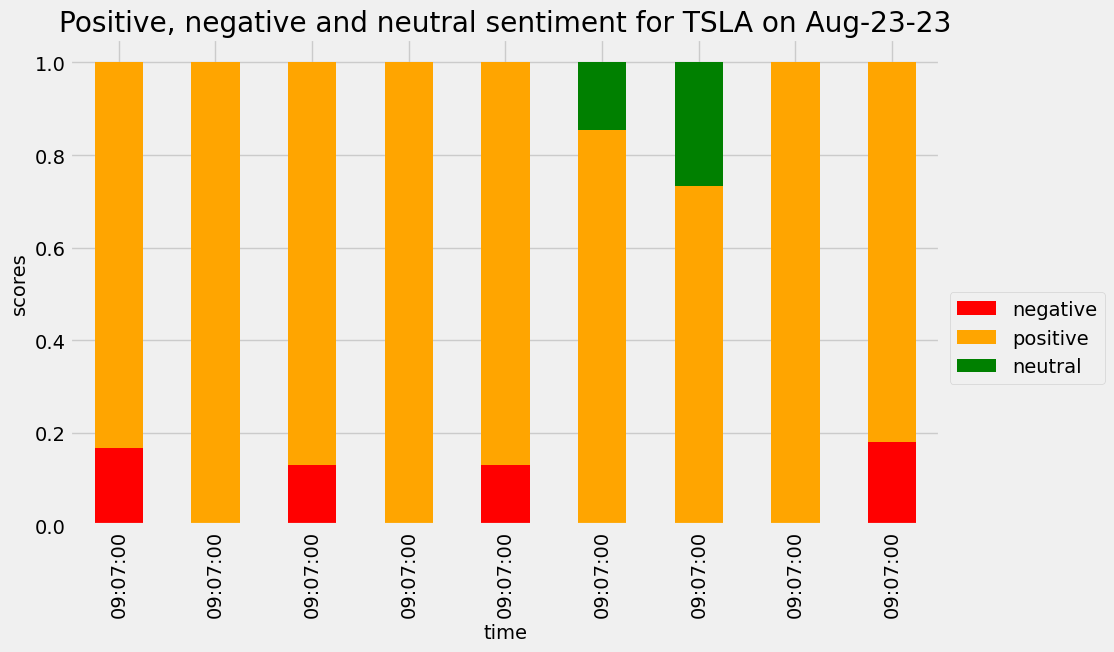

In [23]:
title = "Positive, negative and neutral sentiment for TSLA on Aug-23-23"
colors = ["red", "orange", "green"]
plot_day = single_day.drop(['headline','source', 'cleaned_headline', 'compound','sentiment_label'], axis=1)
plot_day.columns = ['negative', 'positive', 'neutral']
plot_day.plot.bar(stacked = True, 
                  figsize=(10, 6), 
                  title = title, 
                  color = colors).legend(bbox_to_anchor=(1.2, 0.5))
plt.ylabel("scores")

In [ ]:
scored_news.to_csv('headline_sentiment.csv', index=False)